In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = "data/train.csv"
df = pd.read_csv(path)
ex = df[df['id'] == 30192]
ex.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0


In [22]:
# Display all model used in the dataset

model = df[['model_a','model_b']].stack().unique()

#print(f'Number of model in the training set : {len(model)}\n %s' %'\n'.join(model))



   response_len  winner
0          4538       1
1          3114       0
2           921       0
3          3182       1
4          1300       0


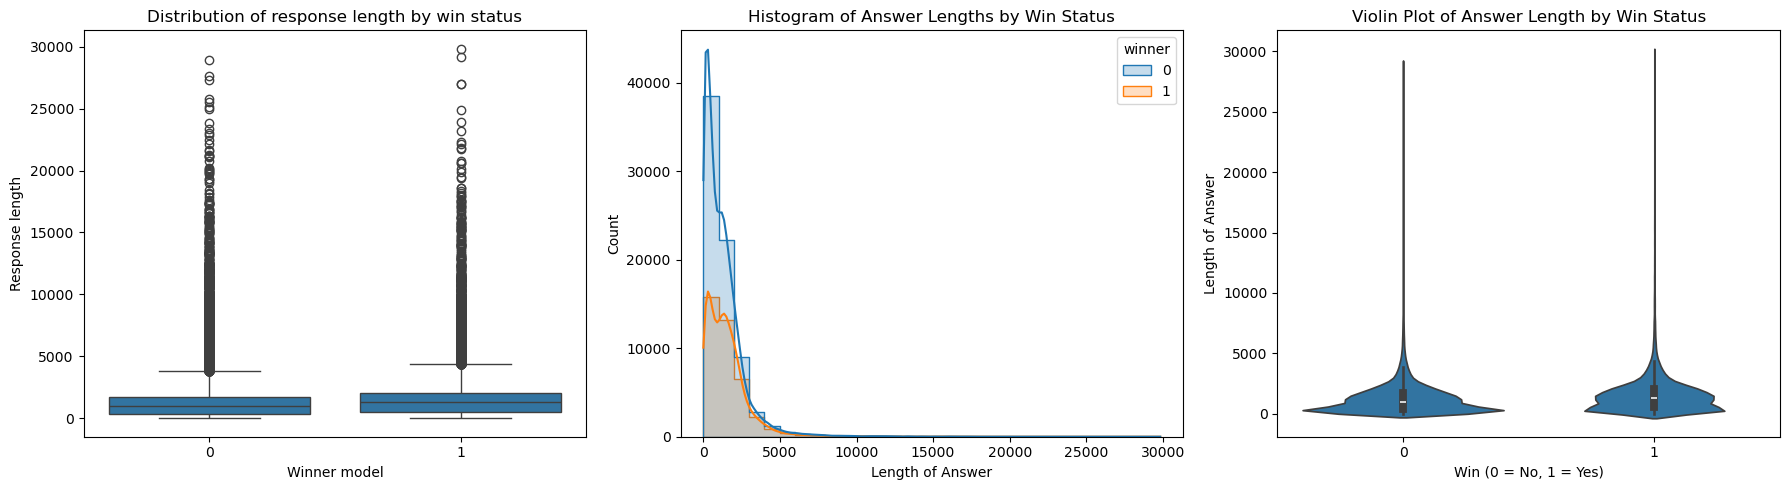

In [47]:
# Groupy by Answer length 
df['response_a_len'] = df['response_a'].apply(lambda x : len(x))
df['response_b_len'] = df['response_b'].apply(lambda x : len(x))

# Rename columns to have consistent names
df_a = df[['response_a_len', 'winner_model_a']].rename(columns={'response_a_len': 'response_len', 'winner_model_a': 'winner'})
df_b = df[['response_b_len', 'winner_model_b']].rename(columns={'response_b_len': 'response_len', 'winner_model_b': 'winner'})

# Stack (concatenate) the two DataFrames
df_stacked = pd.concat([df_a, df_b], ignore_index=True)

df_stacked = df_stacked[df_stacked['response_len'] <= 30000]
# Display the result
print(df_stacked.head())
# Create subplot with 1 col 3 row 
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot
sns.boxplot(x=df_stacked['winner'],y=df_stacked['response_len'],ax= axes[0])
axes[0].set_xlabel("Winner model")
axes[0].set_ylabel("Response length")
axes[0].set_title("Distribution of response length by win status")

# Histogram
sns.histplot(data=df_stacked,x='response_len',hue='winner',kde=True,bins=30,element='step',ax = axes[1])
axes[1].set_title("Histogram of Answer Lengths by Win Status")
axes[1].set_xlabel("Length of Answer")
axes[1].set_ylabel("Count")

# Violin Plot
sns.violinplot(x=df_stacked['winner'], y=df_stacked['response_len'], ax=axes[2])
axes[2].set_title("Violin Plot of Answer Length by Win Status")
axes[2].set_xlabel("Win (0 = No, 1 = Yes)")
axes[2].set_ylabel("Length of Answer")

plt.tight_layout()
plt.show()

In [66]:
# Calculate Win Rate of model 

# Calculate number of win 
win_a = df.groupby(by='model_a')['winner_model_a'].sum()
win_b = df.groupby(by='model_b')['winner_model_b'].sum()
win_total = win_a.add(win_b,fill_value=0)

# Calculate total participation
participation_a = df['model_a'].value_counts()
participation_b = df['model_b'].value_counts()
total_participation = participation_a.add(participation_b,fill_value=0)

# Calculate win rate
win_rate = (win_total / total_participation).sort_values(ascending=False)  # Sort from highest to lowest win rate

# Display result
print(win_rate)

model_a
gpt-4-1106-preview         0.551374
gpt-3.5-turbo-0314         0.546083
gpt-4-0125-preview         0.513793
gpt-4-0314                 0.483503
claude-1                   0.439165
                             ...   
stablelm-tuned-alpha-7b    0.171206
llama-13b                  0.160878
chatglm3-6b                0.158746
dolly-v2-12b               0.155000
chatglm2-6b                0.129433
Length: 64, dtype: float64
